In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data=pd.read_csv("car.csv")
car_data

,production_month_year,Quantity,defects
0,Aug-19,0,NaN
1,Sep-19,32,2.0
2,Oct-19,30,1.0
3,Nov-19,13,NaN
4,Dec-19,0,0.0
5,Jan-20,0,NaN
6,Feb-20,0,NaN
7,Mar-20,0,NaN
8,Apr-20,0,NaN


In [3]:
#considering transmission batch as Aug-2019

In [4]:
#to find the cumulative volume of cars produced (based on quantity)
cumulative_quantity=car_data["Quantity"].cumsum()
cumulative_quantity

0     0
1    32
2    62
3    75
4    75
5    75
6    75
7    75
8    75
Name: Quantity, dtype: int64

In [5]:
car_data.insert(2,"cumulative_quantity",cumulative_quantity)

In [6]:
car_data

,production_month_year,Quantity,cumulative_quantity,defects
0,Aug-19,0,0,NaN
1,Sep-19,32,32,2.0
2,Oct-19,30,62,1.0
3,Nov-19,13,75,NaN
4,Dec-19,0,75,0.0
5,Jan-20,0,75,NaN
6,Feb-20,0,75,NaN
7,Mar-20,0,75,NaN
8,Apr-20,0,75,NaN


In [7]:
#no of months in service as on april-2020
len(car_data)
num=[]
for i in range(0,car_data.shape[0]):
#     print(i)
    num.append(i) 

In [8]:
num_rev=num[::-1]
num_rev

[8, 7, 6, 5, 4, 3, 2, 1, 0]

In [9]:
car_data.insert(3,"Volume_of_cars_till_last_prod_monthYear",num_rev)
car_data


,production_month_year,Quantity,cumulative_quantity,Volume_of_cars_till_last_prod_monthYear,defects
0,Aug-19,0,0,8,NaN
1,Sep-19,32,32,7,2.0
2,Oct-19,30,62,6,1.0
3,Nov-19,13,75,5,NaN
4,Dec-19,0,75,4,0.0
5,Jan-20,0,75,3,NaN
6,Feb-20,0,75,2,NaN
7,Mar-20,0,75,1,NaN
8,Apr-20,0,75,0,NaN


In [10]:
#to calculate repairs per hundred
# formula=defects/volume*100
rph_cal=[]
for j,k in zip(car_data["defects"],car_data["Volume_of_cars_till_last_prod_monthYear"]):
    if k==0:
        r==0
    else:
        r=(j/k)*100
    rph_cal.append(r)
rph_cal
    

[nan, 28.57142857142857, 16.666666666666664, nan, 0.0, nan, nan, nan, nan]

In [11]:
car_data["rph"]=rph_cal
car_data

,production_month_year,Quantity,cumulative_quantity,Volume_of_cars_till_last_prod_monthYear,defects,rph
0,Aug-19,0,0,8,NaN,NaN
1,Sep-19,32,32,7,2.0,28.571429
2,Oct-19,30,62,6,1.0,16.666667
3,Nov-19,13,75,5,NaN,NaN
4,Dec-19,0,75,4,0.0,0.000000
5,Jan-20,0,75,3,NaN,NaN
6,Feb-20,0,75,2,NaN,NaN
7,Mar-20,0,75,1,NaN,NaN
8,Apr-20,0,75,0,NaN,NaN


In [12]:
car_data["rph"]=car_data["rph"].fillna(0)
car_data["cumulative_rph"]=car_data["rph"].cumsum()
car_data

,production_month_year,Quantity,cumulative_quantity,Volume_of_cars_till_last_prod_monthYear,defects,rph,cumulative_rph
0,Aug-19,0,0,8,NaN,0.000000,0.000000
1,Sep-19,32,32,7,2.0,28.571429,28.571429
2,Oct-19,30,62,6,1.0,16.666667,45.238095
3,Nov-19,13,75,5,NaN,0.000000,45.238095
4,Dec-19,0,75,4,0.0,0.000000,45.238095
5,Jan-20,0,75,3,NaN,0.000000,45.238095
6,Feb-20,0,75,2,NaN,0.000000,45.238095
7,Mar-20,0,75,1,NaN,0.000000,45.238095
8,Apr-20,0,75,0,NaN,0.000000,45.238095


In [13]:
car_data.insert(0,"MIS",num)
car_data

,MIS,production_month_year,Quantity,cumulative_quantity,Volume_of_cars_till_last_prod_monthYear,defects,rph,cumulative_rph
0,0,Aug-19,0,0,8,NaN,0.000000,0.000000
1,1,Sep-19,32,32,7,2.0,28.571429,28.571429
2,2,Oct-19,30,62,6,1.0,16.666667,45.238095
3,3,Nov-19,13,75,5,NaN,0.000000,45.238095
4,4,Dec-19,0,75,4,0.0,0.000000,45.238095
5,5,Jan-20,0,75,3,NaN,0.000000,45.238095
6,6,Feb-20,0,75,2,NaN,0.000000,45.238095
7,7,Mar-20,0,75,1,NaN,0.000000,45.238095
8,8,Apr-20,0,75,0,NaN,0.000000,45.238095


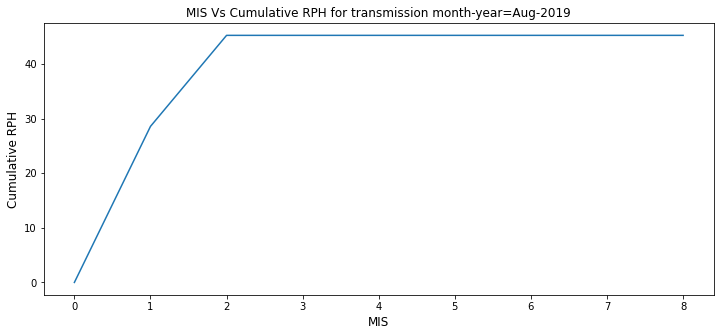

In [14]:
plt.figure(figsize=[12,5])
plt.plot(car_data["MIS"],car_data["cumulative_rph"])
plt.xlabel("MIS",fontsize=12)
plt.ylabel("Cumulative RPH",fontsize=12)
plt.title("MIS Vs Cumulative RPH for transmission month-year=Aug-2019",fontsize=12)
plt.show()